
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

**Data Background:**

**Importing the File:**

In [0]:
# Load January 2025 NYC Yellow Taxi Data
file_location = "/FileStore/tables/yellow_tripdata_2025_01.parquet"

# Read Parquet file using Spark
df = spark.read.parquet(file_location)

# Print the schema to understand structure
df.printSchema()

# Preview the first 5 rows
df.show(5)


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------

**SQL View of Data - Understanding the Data to prep for cleaning**

In [0]:
# DataFrame as a temporary SQL table
df.createOrReplaceTempView("nyc_taxi_raw")

In [0]:
%sql
SELECT
tpep_pickup_datetime,
tpep_dropoff_datetime,
passenger_count,
trip_distance,
fare_amount,
payment_type
FROM nyc_taxi_raw
LIMIT 25


tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,payment_type
2025-01-01T00:18:38,2025-01-01T00:26:59,1,1.6,10.0,1
2025-01-01T00:32:40,2025-01-01T00:35:13,1,0.5,5.1,1
2025-01-01T00:44:04,2025-01-01T00:46:01,1,0.6,5.1,1
2025-01-01T00:14:27,2025-01-01T00:20:01,3,0.52,7.2,2
2025-01-01T00:21:34,2025-01-01T00:25:06,3,0.66,5.8,2
2025-01-01T00:48:24,2025-01-01T01:08:26,2,2.63,19.1,2
2025-01-01T00:14:47,2025-01-01T00:16:15,0,0.4,4.4,1
2025-01-01T00:39:27,2025-01-01T00:51:51,0,1.6,12.1,1
2025-01-01T00:53:43,2025-01-01T01:13:23,0,2.8,19.1,1
2025-01-01T00:00:02,2025-01-01T00:09:36,1,1.71,11.4,2


In [0]:
%sql
SELECT trip_distance, fare_amount, passenger_count
FROM nyc_taxi_raw
WHERE trip_distance <= 0




trip_distance,fare_amount,passenger_count
0.0,20.06,1
0.0,12.0,1
0.0,30.0,3
0.0,50.5,1
0.0,20.0,4
0.0,3.0,0
0.0,5.0,1
0.0,20.0,4
0.0,3.0,1
0.0,85.0,4


In [0]:
%sql
SELECT fare_amount, trip_distance, passenger_count
FROM nyc_taxi_raw
WHERE fare_amount <= 0
ORDER BY fare_amount




fare_amount,trip_distance,passenger_count
-900.0,0.1,1
-850.0,0.0,1
-826.2,132.27,1
-700.0,0.0,1
-700.0,0.0,1
-700.0,0.0,1
-700.0,0.35,1
-700.0,0.0,4
-634.4,78.94,4
-600.0,0.0,1


In [0]:
%sql
SELECT passenger_count, COUNT(*) as ride_count
FROM nyc_taxi_raw
GROUP BY passenger_count
ORDER BY ride_count DESC



passenger_count,ride_count
1,2322434
null,540149
2,407761
3,91409
4,59009
0,24656
5,17786
6,12004
8,11
7,4


In [0]:
%sql
SELECT trip_distance, fare_amount, tpep_pickup_datetime
FROM nyc_taxi_raw
WHERE trip_distance > 100 OR fare_amount > 500
ORDER BY fare_amount DESC




trip_distance,fare_amount,tpep_pickup_datetime
1.6,863372.12,2025-01-20T12:07:18
255.33,2450.9,2025-01-16T12:23:14
188.88,1309.2,2025-01-21T05:17:57
0.0,950.0,2025-01-26T00:04:04
0.0,950.0,2025-01-26T00:22:47
0.0,950.0,2025-01-26T00:24:25
143.54,936.8,2025-01-15T19:14:42
0.1,900.0,2025-01-07T19:12:25
0.0,900.0,2025-01-26T00:00:56
0.0,899.99,2025-01-25T23:56:58


Before cleaning the NYC Yellow Taxi dataset, our team used Spark SQL to explore common data quality issues. We found that over 10,000 records had a trip distance of zero, which is unrealistic for a taxi ride and likely represents bad data. More than 10,000 records had a fare amount less than or equal to zero, which could indicate system errors, incomplete transactions, or data entry errors. We also found a small number of extreme outliers. 206 records had either a trip distance greater than 100 miles or a fare amount above $500. Lastly, when analyzing passenger count, we observed that the majority of rides had between 1 and 6 passengers, while some records had null values, zeros, or unusually high counts, which are likely errors. These findings helped shape the cleaning rules we applied in the next step.

**Cleaning and Transforming the Data**

Based on the issues identified during data exploration, we applied a series of filters to clean the dataset and ensure it was suitable for analysis and modeling. First, we removed all records with a trip distance less than or equal to zero and any fare amounts less than or equal to zero, since these likely represent incomplete or invalid trips. Next, we filtered the data to keep only rides with a passenger count between 1 and 6, excluding nulls, zeros, and unusually high counts that fall outside the typical range for taxi rides. These cleaning steps helped reduce noise and improve the overall quality of the dataset, making it more reliable for machine learning tasks.

In [0]:
# Filter out trips with invalid trip distance or fare amount
# These are likely errors for example, rides with 0 miles or negative or $0.00 fare price
df_cleaned = df.filter(
    (df.trip_distance > 0) & 
    (df.fare_amount > 0)
)


In [0]:
# Keep only rides with a realistic passenger count (1 to 6)
# This removes rows with 0, null, or high passenger counts 
df_cleaned = df_cleaned.filter(
    (df_cleaned.passenger_count >= 1) & 
    (df_cleaned.passenger_count <= 6)
)

In [0]:
# Drop any remaining rows with null values
df_cleaned = df_cleaned.dropna()

In [0]:
# Print the schema of the cleaned DataFrame
# This shows column names and data types after cleaning
df_cleaned.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [0]:
# Preview the first 5 rows of cleaned data
df_cleaned.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|         237|           1|       10.0|  3.5|    0.5|       3.

In [0]:
# Compare row counts before and after cleaning
print("Original row count:", df.count())
print("Cleaned row count:", df_cleaned.count())

Original row count: 3475226
Cleaned row count: 2816825


Now that the dataset has been cleaned to remove invalid trip records, the next step is to transform key variables to make the data more useful for analysis and machine learning. The raw dataset includes timestamp columns for pickup and dropoff times, which are not immediately usable in their current form. To make them more meaningful, we will create a new column that calculates the total trip duration in minutes. This will help us understand the length of each ride and could be valuable in predicting fare amounts or traffic patterns. In addition, we will extract the pickup hour from the timestamp to analyze time-of-day effects, such as rush hour trends. These transformed columns will serve as engineered features that improve the quality of input for future models and allow for deeper insight into passenger behavior and trip characteristics.

In [0]:
from pyspark.sql.functions import unix_timestamp, col, hour

# Create a new column for trip duration in minutes
# This calculates the time between pickup and dropoff and transforms it to total minutes
df_transformed = df_cleaned.withColumn(
    "trip_duration_minutes",
    (unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")) / 60
)

In [0]:
# Create a new column for the pickup hour
# This will help analyze time-of-day patterns (ex. rush hour, morning, etc.)
df_transformed = df_transformed.withColumn(
    "pickup_hour",
    hour("tpep_pickup_datetime")
)

In [0]:
# Additional cleaning is needed after the transformation step to remove outliers
# Remove unrealistic outliers from fare, distance, and trip duration
df_transformed = df_transformed.filter(
    (df_transformed.fare_amount <= 500) &              # Remove high fare values
    (df_transformed.trip_distance <= 100) &             # Keep trips under 100 miles
    (df_transformed.trip_duration_minutes >= 0) &       # Remove negative durations
    (df_transformed.trip_duration_minutes <= 180)       # Remove trips over 3 hours
)


In [0]:
# Preview the transformed dataset
df_transformed.printSchema()
df_transformed.select(
    "tpep_pickup_datetime", 
    "tpep_dropoff_datetime", 
    "trip_duration_minutes", 
    "pickup_hour"
).show(5)

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- pickup_hour: integer (nullable = true)

+--------------------+------

In [0]:
# Keeping only the necessary columns (after all transformations and cleaning)
df_transformed = df_transformed.select(
    "VendorID", 
    "passenger_count", 
    "trip_distance", 
    "payment_type", 
    "fare_amount", 
    "tip_amount", 
    "tolls_amount", 
    "total_amount",
    "pickup_hour",
    "congestion_surcharge", 
    "trip_duration_minutes",
    "PULocationID",
    "DOLocationID"
)

# Confirm the schema of the cleaned data
df_transformed.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_hour: integer (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)



In [0]:
# Remove all negative values where not allowed 
df_transformed = df_transformed.filter(
    (df_transformed.trip_distance >= 0) &  # No negative trip distances
    (df_transformed.fare_amount >= 0) &    # No negative fare amounts
    (df_transformed.tip_amount >= 0) &     # No negative tip amounts
    (df_transformed.tolls_amount >= 0) &   # No negative tolls
    (df_transformed.total_amount >= 0) &   # No negative total fare
    (df_transformed.congestion_surcharge >= 0) &  # No negative surcharge
    (df_transformed.trip_duration_minutes >= 0)    # No negative duration
)

# Verify that there are no negative values
df_transformed.describe().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+---------------------+------------------+------------------+
|summary|          VendorID|   passenger_count|     trip_distance|      payment_type|       fare_amount|        tip_amount|      tolls_amount|      total_amount|       pickup_hour|congestion_surcharge|trip_duration_minutes|      PULocationID|      DOLocationID|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+---------------------+------------------+------------------+
|  count|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|             2815454|             

In [0]:
# Double Check for null values in each column of the cleaned dataset
from pyspark.sql.functions import col

# List of columns to check for nulls
columns_to_check = [
    "VendorID", 
    "passenger_count", 
    "trip_distance", 
    "payment_type", 
    "fare_amount", 
    "tip_amount", 
    "tolls_amount", 
    "total_amount", 
    "congestion_surcharge", 
    "trip_duration_minutes"
]

# Check each column for null values to do final verification
for column in columns_to_check:
    null_count = df_transformed.filter(col(column).isNull()).count()
    print(f"Null values in {column}: {null_count}")


Null values in VendorID: 0
Null values in passenger_count: 0
Null values in trip_distance: 0
Null values in payment_type: 0
Null values in fare_amount: 0
Null values in tip_amount: 0
Null values in tolls_amount: 0
Null values in total_amount: 0
Null values in congestion_surcharge: 0
Null values in trip_duration_minutes: 0


In [0]:
# Compare row counts before and after cleaning
print("Original row count:", df.count())
print("Cleaned row count:", df_transformed.count())

Original row count: 3475226
Cleaned row count: 2815454


After transforming and cleaning the January 2025 NYC taxi dataset, our team performed additional steps to ensure the data was ready for analysis and modeling. Rows were removed with unrealistic outliers, such as extremely high fare amounts over $500, trip distances exceeding 100 miles, and trip durations either negative or longer than 3 hours. These values were either data entry errors or rare cases that do not reflect typical taxi behavior. By filtering out these rows, we eliminated noise and ensured that the dataset accurately represented real-world taxi trips, allowing the model to learn from meaningful patterns rather than outliers in the data.

Although this cleaning process resulted in the removal of over 660,000 rows, the dataset still contains over 2.8 million valid records, which is sufficient for building accurate machine learning models. This large sample size provides a diversity of trip data, including typical fare amounts, trip distances, and durations. The remaining dataset is highly representative of everyday taxi rides and will ensure that modeling will be efficient. 

In summary, the data cleaning and transformation process has left us with a clean, diverse, and representative dataset that is ideal for training machine learning models. The 2.8 million records provide usable data to extract valuable insights and make accurate predictions. By focusing on valid and realistic trips, this dataset is now well prepared for the next steps in exploring and visualizing the data. 

**Exploratory Data Analysis (EDA) & Visualization**

In [0]:
# Show basic summary statistics
df_transformed.select(
    "fare_amount", 
    "trip_distance", 
    "trip_duration_minutes"
).describe().show()


+-------+------------------+------------------+---------------------+
|summary|       fare_amount|     trip_distance|trip_duration_minutes|
+-------+------------------+------------------+---------------------+
|  count|           2815454|           2815454|              2815454|
|   mean| 17.93183190703969|3.1760476640711066|   14.585134984743355|
| stddev|16.889947609241254| 4.298758493147229|   11.717878055732225|
|    min|              0.01|              0.01|                  0.0|
|    max|             500.0|             97.58|   179.96666666666667|
+-------+------------------+------------------+---------------------+



In [0]:
# Showing fare quartiles for EDA
fare_quartiles = df_transformed.approxQuantile("fare_amount", [0.25, 0.5, 0.75], 0.01)
print("Fare Amount Quartiles:", fare_quartiles)


Fare Amount Quartiles: [8.6, 12.8, 19.8]


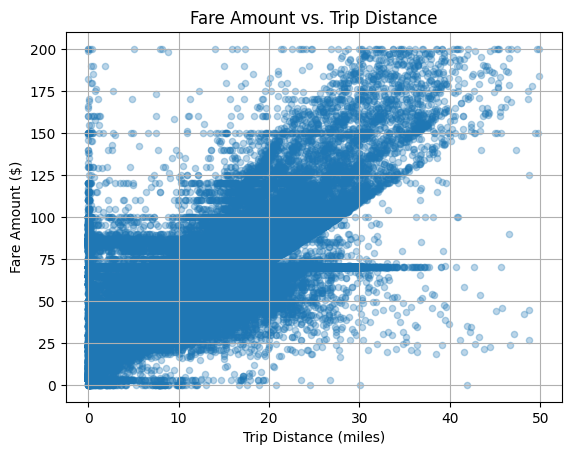

In [0]:
# Scatter plot to visualize the relationship between trip distance and fare amount

df_transformed.filter(
    (df_transformed.trip_distance <= 50) & 
    (df_transformed.fare_amount <= 200)
).select("trip_distance", "fare_amount") \
.toPandas().plot(kind="scatter", x="trip_distance", y="fare_amount", alpha=0.3)

import matplotlib.pyplot as plt
plt.title("Fare Amount vs. Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


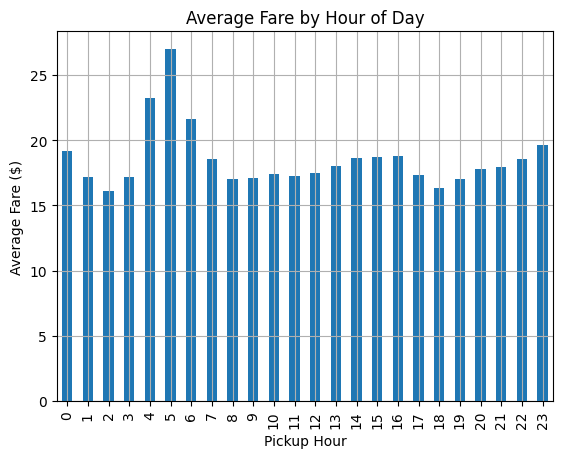

In [0]:
# Bar plot to show how average fare changes by hour of the day

df_transformed.groupBy("pickup_hour").avg("fare_amount").orderBy("pickup_hour") \
.toPandas().plot(x="pickup_hour", y="avg(fare_amount)", kind="bar", legend=False)

plt.title("Average Fare by Hour of Day")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()


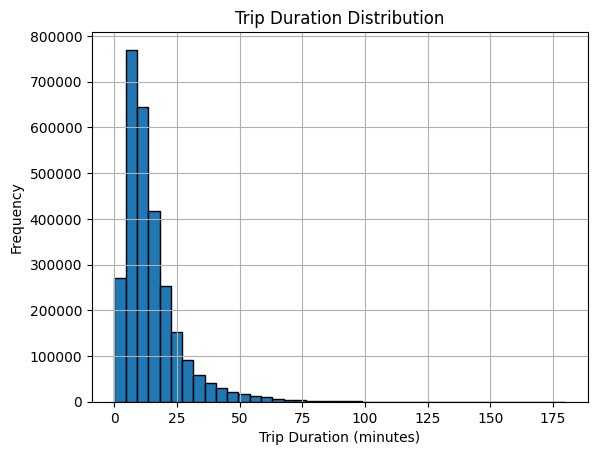

In [0]:
# Histogram of trip durations to see distribution of ride lengths

df_transformed.select("trip_duration_minutes").toPandas()["trip_duration_minutes"] \
.plot(kind="hist", bins=40, edgecolor="black")

plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


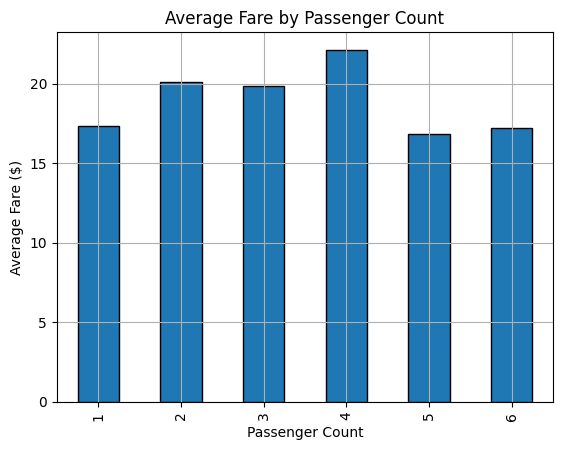

In [0]:
# Bar plot to explore how average fare changes with number of passengers

df_transformed.groupBy("passenger_count").avg("fare_amount").orderBy("passenger_count") \
.toPandas().plot(x="passenger_count", y="avg(fare_amount)", kind="bar", edgecolor="black", legend=False)

plt.title("Average Fare by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()


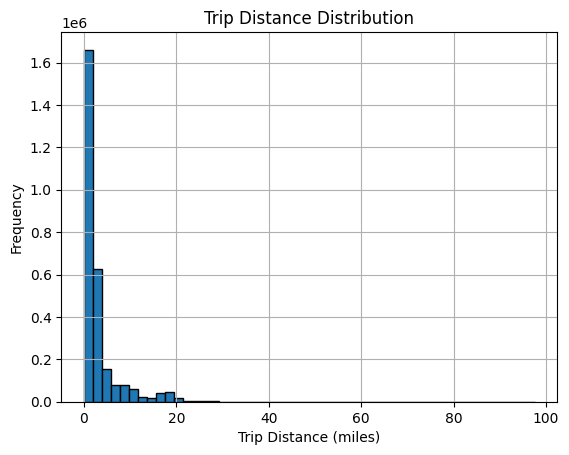

In [0]:
# Histogram of trip distances to understand typical ride lengths

df_transformed.select("trip_distance").toPandas()["trip_distance"] \
.plot(kind="hist", bins=50, edgecolor="black")

plt.title("Trip Distance Distribution")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


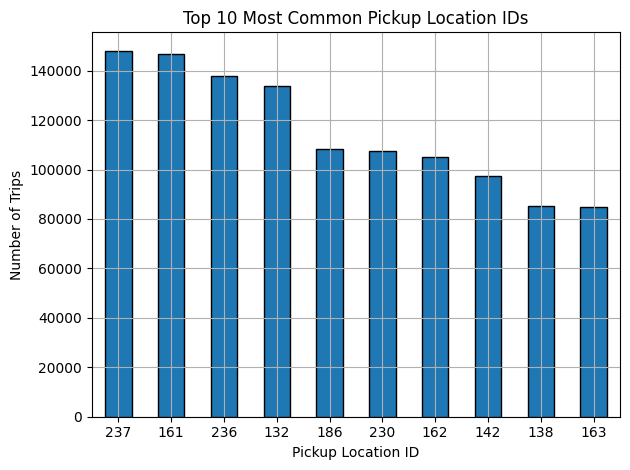

In [0]:
# Group by pickup location ID and count number of trips
top_pu = df_transformed.groupBy("PULocationID") \
    .count() \
    .orderBy("count", ascending=False) \
    .limit(10) \
    .toPandas()

# Plot the top pickup location IDs
top_pu.plot(x="PULocationID", y="count", kind="bar", legend=False, edgecolor="black")

import matplotlib.pyplot as plt
plt.title("Top 10 Most Common Pickup Location IDs")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


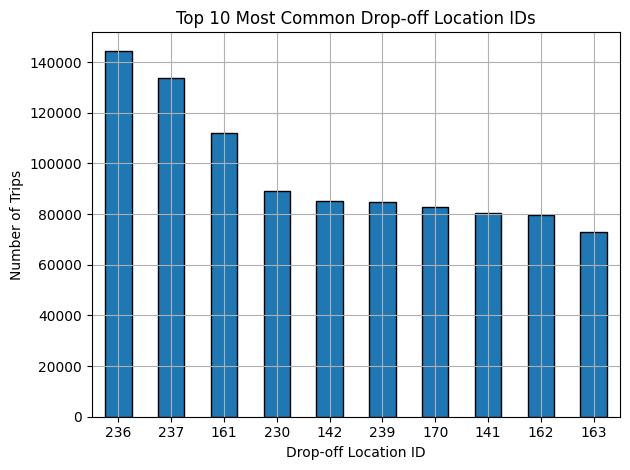

In [0]:
# Group by drop-off location ID and count number of trips
top_do = df_transformed.groupBy("DOLocationID") \
    .count() \
    .orderBy("count", ascending=False) \
    .limit(10) \
    .toPandas()

# Plot the top drop-off location IDs
top_do.plot(x="DOLocationID", y="count", kind="bar", legend=False, edgecolor="black")

import matplotlib.pyplot as plt
plt.title("Top 10 Most Common Drop-off Location IDs")
plt.xlabel("Drop-off Location ID")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


After cleaning and transforming the January 2025 NYC taxi dataset, our team performed an exploratory data analysis to understand trends in trip behavior, fare structure, and location demand. The average fare is $17.93 indicating a slightly right-skewed distribution due to a small number of higher fares. The average trip distance is 3.18 miles, while durations average around 14.6 minutes, with most trips lasting under 20 minutes. Visualizations confirmed that trip distances are heavily concentrated under 5 miles, and that fare amount increases with distance in a generally linear direction, though clusters may suggest pre set pricing. Fares were found to peak for 4-passenger rides, and both fare and trip duration tend to rise during morning and mid-afternoon hours. Lastly, pickup and drop-off location analysis revealed common zones such as 236, 237, and 161, which consistently appear among the top 10 most common locations, highlighting areas of high activity. 

**Machine Learning**

In [0]:
# Display the schema of all columns in the DataFrame
df_transformed.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_hour: integer (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)



In [0]:
# Save to one CSV file in DBFS
df_transformed.coalesce(1).write \
    .mode("overwrite") \
    .option("header", True) \
    .csv("/FileStore/tables/nyc_taxi_cleaned_csv")

